In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [6]:
data = load_breast_cancer()
data.data.shape

(569, 30)

In [7]:
rfc = RandomForestClassifier(n_estimators=100,random_state=100)
rfc_score = cross_val_score(rfc,data.data,data.target,cv=5,scoring='accuracy').mean()
rfc_score

0.9613569321533924

In [12]:
scores = []
for i in range(0,200,10):
    rfc = RandomForestClassifier(n_estimators= i + 1
                                ,n_jobs=-1
                                ,random_state=90)
    score = cross_val_score(rfc,data.data,data.target,cv=10,scoring='accuracy').mean()
    scores.append(score)

print('max score:{}  max index:{}'.format(max(scores),(scores.index(max(scores)) * 10) +1 ))

max score:0.9631265664160402  max index:71


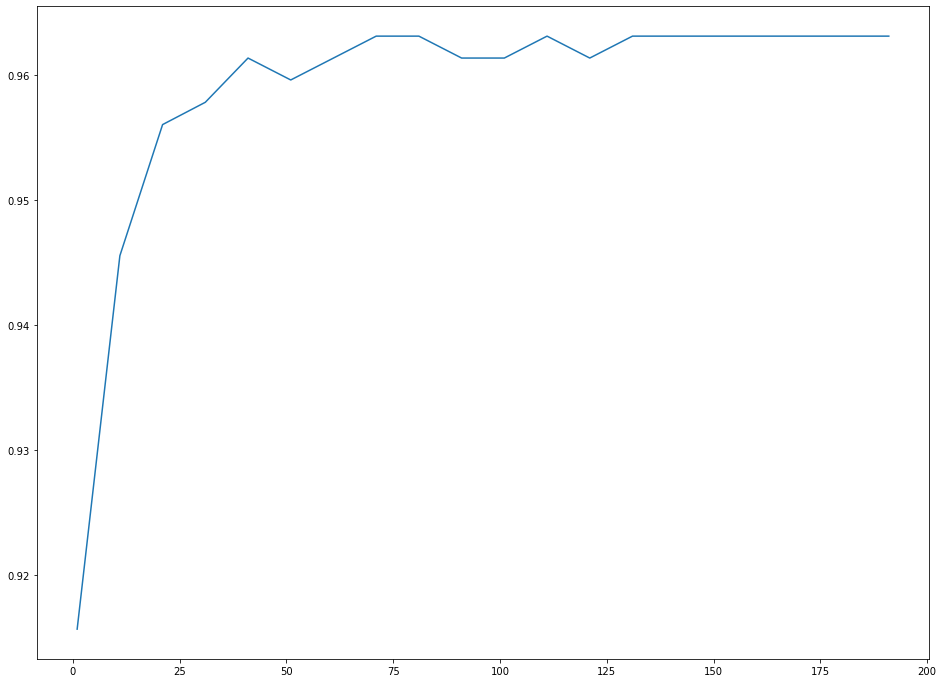

In [13]:
plt.figure(figsize=(16,12))
plt.plot(range(1,201,10),scores)
plt.show()

In [16]:
scores = []
for i in range(60,80):
    rfc = RandomForestClassifier(n_estimators= i + 1
                                ,n_jobs=-1
                                ,random_state=90)
    score = cross_val_score(rfc,data.data,data.target,cv=10,scoring='accuracy').mean()
    scores.append(score)

print('max score:{}  max index:{}'.format(max(scores),60 + scores.index(max(scores)) +1 ))

max score:0.9666353383458647  max index:73


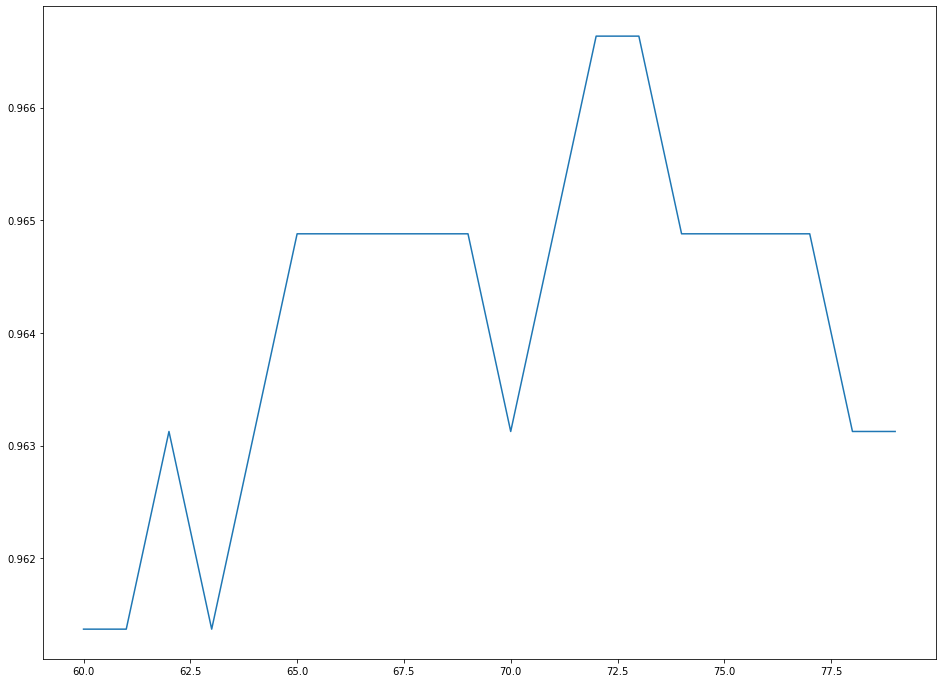

In [15]:
plt.figure(figsize=(16,12))
plt.plot(range(60,80),scores)
plt.show()

In [21]:
# 调整max_depth
param_grid = {
    'max_depth':np.arange(1,20,1),
    'max_features': np.arange(5,30,1),
}

rfc = RandomForestClassifier(n_estimators=73,random_state=90)
gs = GridSearchCV(rfc,param_grid=param_grid,cv=10)
gs.fit(data.data,data.target)
gs.best_params_

{'max_depth': 7, 'max_features': 27}

In [22]:
gs.best_score_

0.968421052631579

In [27]:
param_grid={'min_samples_leaf':np.arange(1, 1+10, 1)
            ,'criterion':['gini','entropy']
            ,'min_samples_split':np.arange(2,2 + 20,1)}

rfc = RandomForestClassifier(n_estimators=73,random_state=90,max_depth=7,max_features=27)
gs = GridSearchCV(rfc,param_grid=param_grid,cv=10)
gs.fit(data.data,data.target)
print("best params:{} best score:{} ".format(gs.best_params_,gs.best_score_))

best params:{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2} best score:0.968421052631579 
